In [1]:
import sys
assert sys.version_info.major is 3

In [2]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4MB 5.9MB/s 
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.26.0 which is incompatible.
TensorFlow version: 2.4.1


## Model

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))

4423680/4422102 [==============================] - 0s 0us/step

train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


In [4]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')
])
model.summary()

testing = False
epochs = 5

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=epochs)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {}'.format(test_acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7298 - accuracy: 0.7528
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4021 - accuracy: 0.8587
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3572 - accuracy: 0.8745
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.33

# Save your model

In [5]:
version = 1 # tensorflow helps you to save different version of model
MODEL_DIR = 'export_model'
export_path = os.path.join(MODEL_DIR, str(version))
print(export_path)

# dump model
tf.keras.models.save_model(   model,
                              export_path,
                              overwrite=True,
                              include_optimizer=True,
                              save_format=None,
                              signatures=None,
                              options=None
                          )

export_model/1
INFO:tensorflow:Assets written to: export_model/1/assets


In [6]:
# Examine your saved model
! saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Softmax'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0217 09:56:03.914572 139903787530112 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/pytho

In [7]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14863      0 --:--:-- --:--:-- --:--:-- 14863
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.0 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  R

In [8]:
! apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.1 [223 MB]
Fetched 223 MB in 4s (54.7 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 146425 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.1_all.deb ...
Unpacking tensorflow-model-server (2.4.1) ...
Setting up tensorflow-model-server (2.4.1) ...


In [9]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [10]:
%%writefile model.config

model_config_list {
  config {
    name: 'fashion_model'
    base_path: '/content/export_model'
    model_platform: 'tensorflow'
    model_version_policy {
                  specific {versions: 1}
                  }
        }
    version_labels{
        key:'stable'
        value:1
    }
}

Writing model.config


In [20]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8510 \
  --model_name=fashion_model \
  --model_config_file = "/content/model.config" \
  --model_base_path="/content/export_model" >server.log 2>&1

Starting job # 2 in a separate thread.


In [12]:
! tail server.log

2021-02-17 09:58:41.951412: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-02-17 09:58:41.952209: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200205000 Hz
2021-02-17 09:58:41.976841: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /content/export_model/1
2021-02-17 09:58:41.981146: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 51286 microseconds.
2021-02-17 09:58:41.981801: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /content/export_model/1/assets.extra/tf_serving_warmup_requests
2021-02-17 09:58:41.981947: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2021-02-17 09:58:41.983176: I tensorflow_ser

In [13]:
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

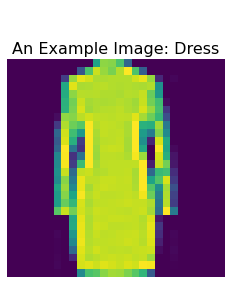

In [14]:
import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [15]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [16]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8510/v1/models/fashion_model:predict', data=data, headers=headers)

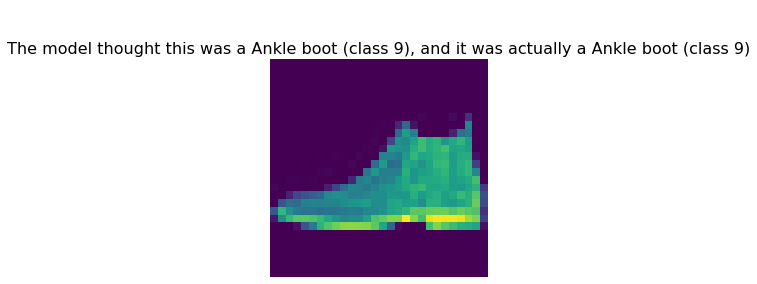

In [17]:
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

# call specific version of model

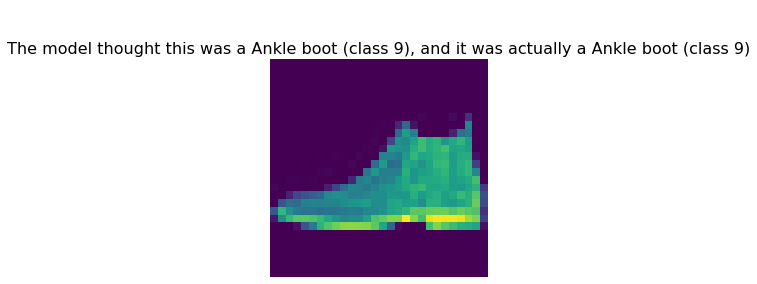

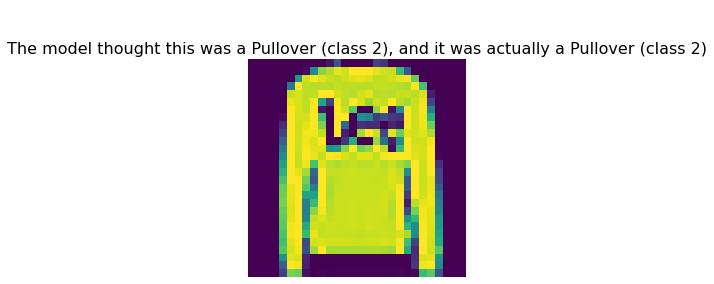

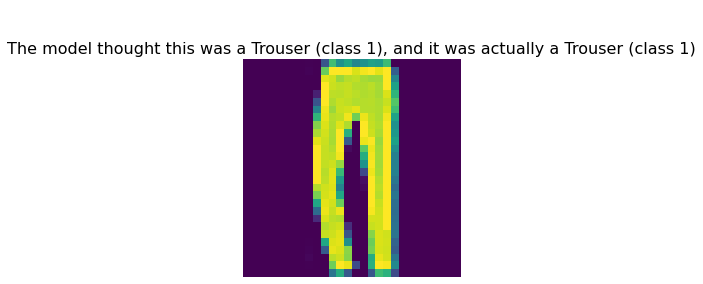

In [18]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8510/v1/models/fashion_model/versions/1:predict', data=data, headers=headers) # add version

predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))

## Metadata

In [21]:
headers = {"content-type": "application/json"}
json_response = requests.get('http://localhost:8510/v1/models/fashion_model/versions/1/metadata', data=data, headers=headers) # add version 

In [22]:
json_response.json()

{'metadata': {'signature_def': {'signature_def': {'__saved_model_init_op': {'inputs': {},
     'method_name': '',
     'outputs': {'__saved_model_init_op': {'dtype': 'DT_INVALID',
       'name': 'NoOp',
       'tensor_shape': {'dim': [], 'unknown_rank': True}}}},
    'serving_default': {'inputs': {'Conv1_input': {'dtype': 'DT_FLOAT',
       'name': 'serving_default_Conv1_input:0',
       'tensor_shape': {'dim': [{'name': '', 'size': '-1'},
         {'name': '', 'size': '28'},
         {'name': '', 'size': '28'},
         {'name': '', 'size': '1'}],
        'unknown_rank': False}}},
     'method_name': 'tensorflow/serving/predict',
     'outputs': {'Softmax': {'dtype': 'DT_FLOAT',
       'name': 'StatefulPartitionedCall:0',
       'tensor_shape': {'dim': [{'name': '', 'size': '-1'},
         {'name': '', 'size': '10'}],
        'unknown_rank': False}}}}}}},
 'model_spec': {'name': 'fashion_model', 'signature_name': '', 'version': '1'}}